# Задание 1. Лийнейная регрессия











Для выполнения заданий нам понадобится библиотека для работы с матрицами **numpy** 

Небольшое введение по работу с numpy: http://pyviy.blogspot.ru/2009/09/numpy.html

### Мы будем решать задачу определения стоимости недвижимости

Исходные данные находятся в data.csv  
Столбцы:  
Index  
A1, the local selling prices, in hundreds of dollars;  
A2, the number of bathrooms;  
A3, the area of the site in thousands of square feet;  
A4, the size of the living space in thousands of square feet;  
A5, the number of garages;  
A6, the number of rooms;  
A7, the number of bedrooms;  
A8, the age in years;  
A9, construction type  
A10, architecture type  
A11, number of fire places.  
B, selling price   

    Мы будем искать модель в виде:
    B = A1 * X1 + A2 * X2 + A3 * X3 + A4 * X4 + A5 * X5 + A6 * X6 + A7 * X7
      + A8 * X8 + A9 * X9 + A10 * X10 + A11 * X11

### 1. Чтение данных из файла

In [1]:
#Импорт всех необходимых библиотек
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np

In [0]:
# Только для загрузки cvs файла в Google Colab
from google.colab import files
uploaded = files.upload()

In [4]:
#Чтение данных из файла
my_data = genfromtxt('data.csv', delimiter=' ')
my_data = np.asmatrix(my_data)
my_data #Выводим результат
print(my_data.shape) #.shape возвращает вектор с количеством строк и столбцов в матрице

#Убираем первый столбец матрицы, так как он содержит порядковый номер и последний, так как там значения y
# в скобках указываем [строки которые нам нужны, столбцы которые нам нужны]
# : - все строки, a:b - столбцы от a до b
X = my_data[:,1:(my_data.shape[1]-1)] 
#print(X)
print(X.shape)

(28, 13)
(28, 11)


In [7]:
# y - вектор цен на недвижимость, а X - матрица признаков
y = my_data[:,(my_data.shape[1]-1)] 
print(y)
m = y.shape[0] # количество примеров в обучающей выборке
print(m)

[[25.9]
 [29.5]
 [27.9]
 [25.9]
 [29.9]
 [29.9]
 [30.9]
 [28.9]
 [84.9]
 [82.9]
 [35.9]
 [31.5]
 [31. ]
 [30.9]
 [30. ]
 [28.9]
 [36.9]
 [41.9]
 [40.5]
 [43.9]
 [37.5]
 [37.9]
 [44.5]
 [37.9]
 [38.9]
 [36.9]
 [45.8]
 [41. ]]
28


In [5]:
X_area = X[:,3] #четвертый столбец матрицы X - жилая площадь дома
print(X_area)

[[0.998]
 [1.5  ]
 [1.175]
 [1.232]
 [1.121]
 [0.988]
 [1.24 ]
 [1.501]
 [3.42 ]
 [3.   ]
 [1.225]
 [1.552]
 [0.975]
 [1.121]
 [1.02 ]
 [1.501]
 [1.664]
 [1.488]
 [1.376]
 [1.5  ]
 [1.256]
 [1.69 ]
 [1.82 ]
 [1.652]
 [1.777]
 [1.504]
 [1.831]
 [1.2  ]]


### 2. Зависимость от одной переменной
Предположим, что цена дома зависит только от одного признака - его жилой площади.  
Поэтому за X мы взяли четвертый столбец матрицы признаков  
Построим график зависимости цены от площади

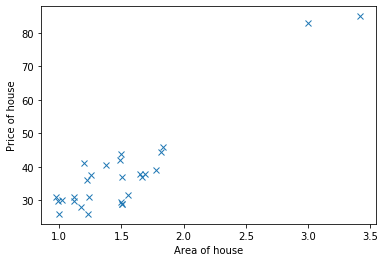

In [8]:
plt.plot(X_area, y,'x')  # 'x' - рисуем наши данные крестиками
plt.xlabel("Area of house")
plt.ylabel("Price of house")
plt.show()

### 3. Функция стоимости
Мы будем искать нашу зависимость в виде прямой y = kx + b, где x - жилая площадь дома, y - цена дома  
То есть требуется найти вектор параметров theta = [b,k]   
Для удобства вычислений добавим в X столбец из единиц,    
**тогда мы сможем вычислять стоимость в векторном виде y = X * theta**

Вопрос: какая размерность будет у y?
**Ответ:** размерность y - (28, 1)

In [9]:
X_area2 = np.append(np.ones((m,1)),X_area,1)
print(X_area2)
print(X_area2.shape)

[[1.    0.998]
 [1.    1.5  ]
 [1.    1.175]
 [1.    1.232]
 [1.    1.121]
 [1.    0.988]
 [1.    1.24 ]
 [1.    1.501]
 [1.    3.42 ]
 [1.    3.   ]
 [1.    1.225]
 [1.    1.552]
 [1.    0.975]
 [1.    1.121]
 [1.    1.02 ]
 [1.    1.501]
 [1.    1.664]
 [1.    1.488]
 [1.    1.376]
 [1.    1.5  ]
 [1.    1.256]
 [1.    1.69 ]
 [1.    1.82 ]
 [1.    1.652]
 [1.    1.777]
 [1.    1.504]
 [1.    1.831]
 [1.    1.2  ]]
(28, 2)


In [0]:
#Операция транспонирования в numpy
a= np.ones((1,3))
print(a)
print(a.T)

print(np.sum(a)) #сумма элементов вектора

print(np.power(np.array([1,3,5]),2)) #поэлементное возведение в квадрат 
print(2 * np.array([1,3,5])) #умножение на число

[[ 1.  1.  1.]]
[[ 1.]
 [ 1.]
 [ 1.]]
3.0
[ 1  9 25]
[ 2  6 10]


Для выполнения алгоритма градиентного спуска нам необходима функция стоимости, которая будет оценивать насколько хорошо алгоритм работает на обучающей выборке.   
**Допишите функцию стоимости чтобы она возвращала правильное значение J.**   
Не забудьте, что эффективнее проводить вычисления с использованием умножения матриц
Обратите внимание, в языке python тело функции не находится внутри фигурных скобок {} как в других языках программирования, тело функций и циклов отделено табуляцией

In [10]:
def cost(X,y,theta):
    m = y.shape[0] # значение которое вам пригодится - длина вектора y
    return np.sum((np.power(X * theta - y, 2))) / (2 * m)

#725.179998161
#Проверим, что функция работает
theta = np.ones((2,1))
print("Ошибка при данном векторе theta составляет:")
print(cost(X_area2,y,theta))

Ошибка при данном векторе theta составляет:
725.1799981607144


### 4. Градиентный спуск

### Задача: Подумайте о том как можно записать формулу обновления вектора theta в виде произведения матрицы X и векторов y и theta без оператора суммы

$$ \theta_1 = \theta_1 - \frac{alpha}{m} * \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})* x_1^{(i)}  $$

Реализуйте алгоритм градиентного спуска, принимающего данные для обучения X и у, скорость обучения alpha и количество итераций, функция gradientDescent должна возвращать найденный вектор параметров theta

In [42]:
theta = np.zeros((2,1)) # в качестве начального значения возьмем нулевой вектор-столбец
iterations = 1500; # количество итераций для выполнения градиентного спуска
alpha = 0.02; # скорость обучения

X = my_data[:,1:(my_data.shape[1]-1)][:, 3]
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = my_data[:,(my_data.shape[1]-1)] 

def gradientDescent(X, y, theta, alpha, iterations):
    m = y.shape[0]
    J_history = np.empty((iterations,1))
    for i in range(iterations):
        thetas = []
        for i in range(theta.shape[0]):
            new_theta = (alpha / m) * np.sum(np.array(X.dot(theta) - y) * np.array(X[:, i]))
            thetas.append([new_theta])
        theta -= thetas
        J_history[i] = cost(X,y,theta) #Будем сохранять ошибку на каждой итерации чтобы построить график
    return theta,J_history

print("Найденный вектор theta алгоритмом градиентного спуска:")
theta_new, J_history = gradientDescent(X,y,theta,alpha,iterations)
print(theta_new)
print("Ошибка при этом значении theta:")
print(cost(X,y,theta_new)) #должна равняться 14.5798981158



Найденный вектор theta алгоритмом градиентного спуска:
[[ 2.90010012]
 [23.3640224 ]]
Ошибка при этом значении theta:
14.579898115763427


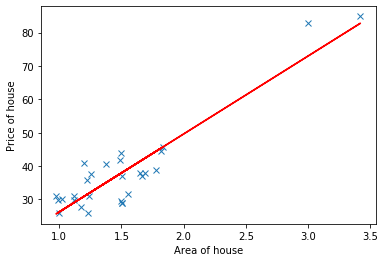

In [40]:
#Нарисуем найденную прямую
plt.plot(X[:,1], y,'x') 
plt.plot(X[:,1], X*theta_new, color='red')

plt.xlabel("Area of house")
plt.ylabel("Price of house")
plt.show()

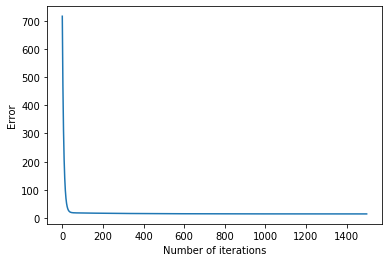

In [41]:
#Выведем график зависимости ошибки от количества итераций в алгоритме градиентного спуска
plt.plot(np.arange(iterations), J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

###### Сколько итераций было бы достаточно для решения этой задачи?

In [103]:
25

25

### 5. Случай нескольких переменных
Рассмотрим случай, когда стоимость дома зависит от 11 признаков. Какую размерность будет иметь вектор theta?

In [44]:
X = my_data[:,1:(my_data.shape[1]-1)] 
print(X.shape)


(28, 11)


Размерность theta будет (11, 1)

### 6. Нормализация данных 

Как мы обсуждали на лекциях, алгоритм градиентного спуска работает лучше с нормализованными данными.  
Выполните нормализацию матрицы X.
Более подробно можно посмотреть здесь: http://www.d.umn.edu/~deoka001/Normalization.html
Использование среднеквадратического отклонения это еще один способ нормализации данных, вместо получения максимального и минимального значения признаков.

Вам может помочь функции: https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html и https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html

Обратите внимание: при вычислении среднего значения можно указать вычислять среднее по столбцам или строкам np.mean(X, axis=0) 

X это матрица в котором строка это пример обучающей выборки, а столбец - признак. Вам необходимо выполнить нормализацию отдельно по каждому признаку.

### 6. Нормализация данных 

Очень часто признаки, используемые для обучения моделей, могут иметь совершенно разный диапазон значений. В этом можно убедиться заглянув в файл data.csv. Для более быстрой сходимости градиентного спуска в таких ситуациях выполняют предварительную нормализацию данных (слайды 30-32 из ОИ-10.pdf) Цель нормализации - привести все признаки в диапазон значений от -0.5 <= x <= 0.5.
X это матрица в котором строка это пример обучающей выборки, а столбец - признак. Нормализация выполняется отдельно по каждому признаку.

In [45]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X)

[[-0.79368826 -0.65094455 -1.2506251  -0.95486086 -0.52879882  0.28305246
   1.02062073  0.41854426  0.61791438 -0.38411064 -0.6882472 ]
 [-0.75814155 -0.65094455 -1.22593778 -0.02170893  1.02976613  0.28305246
   1.02062073  1.8926624  -1.0298573  -0.38411064 -0.6882472 ]
 [-0.92275174 -0.65094455 -1.75148486 -0.62584116 -0.52879882 -0.59755519
  -0.40824829  0.27113244 -0.20597146 -0.38411064 -0.6882472 ]
 [-0.91779174 -0.65094455 -1.00877303 -0.51988566 -0.52879882 -0.59755519
  -0.40824829  1.30301514  1.44180022 -0.38411064 -0.6882472 ]
 [-0.74474265 -0.65094455 -0.8393092  -0.72622005 -0.52879882 -0.59755519
  -0.40824829  0.41854426  0.61791438 -0.38411064 -0.6882472 ]
 [-1.14729533 -0.65094455 -0.8393092  -0.97344955 -0.52879882 -0.59755519
  -0.40824829  1.45042695 -0.20597146 -0.38411064 -0.6882472 ]
 [-0.45599454 -0.65094455 -0.25560047 -0.50501471 -0.52879882  0.28305246
  -0.40824829  1.08189742 -0.20597146 -0.38411064  1.45296631]
 [-0.55729576 -0.65094455  1.2800347  -0.

Добавим к X столбец единиц

In [46]:
X = np.append(np.ones((m,1)),X,1)
print(X.shape)

(28, 12)


Измените функции стоимости и градиентного спуска если они не поддерживают несколько переменных.
Постройте график изменения ошибки от количества итераций

In [47]:
theta = np.zeros((X.shape[1],1))
print("Найденный вектор theta алгоритмом градиентного спуска:")
theta_new , J_history = gradientDescent(X,y,theta,alpha,iterations)
print(theta_new)
print("Ошибка при этом значении theta:") #должна равняться 4.67097703334
print(cost(X,y,theta_new))
'''
Найденный вектор theta алгоритмом градиентного спуска:
[[ 38.15714286]
 [  2.52102402]
 [  4.07947982]
 [  0.48801461]
 [  6.67207163]
 [  1.15959427]
 [ -0.92753869]
 [ -0.32669699]
 [ -0.91006827]
 [  1.19875726]
 [  0.78600669]
 [  1.21493978]]
Ошибка при этом значении theta:
4.67097703334
'''

Найденный вектор theta алгоритмом градиентного спуска:
[[38.15714286]
 [ 2.52102402]
 [ 4.07947982]
 [ 0.48801461]
 [ 6.67207163]
 [ 1.15959427]
 [-0.92753869]
 [-0.32669699]
 [-0.91006827]
 [ 1.19875726]
 [ 0.78600669]
 [ 1.21493978]]
Ошибка при этом значении theta:
4.670977033342052


'\nНайденный вектор theta алгоритмом градиентного спуска:\n[[ 38.15714286]\n [  2.52102402]\n [  4.07947982]\n [  0.48801461]\n [  6.67207163]\n [  1.15959427]\n [ -0.92753869]\n [ -0.32669699]\n [ -0.91006827]\n [  1.19875726]\n [  0.78600669]\n [  1.21493978]]\nОшибка при этом значении theta:\n4.67097703334\n'

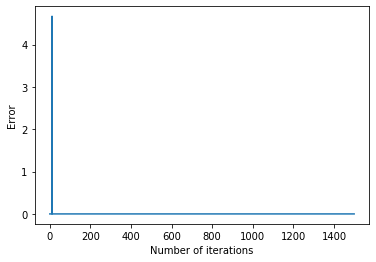

In [48]:
plt.plot(np.arange(1500), J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()